In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population/pop.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_growth.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp_per_capita.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_ppp.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita.csv
/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita_growth.csv
/kaggle/input/country-classification/country_classification.csv
/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv


**Read the csv file for GDP per capita and CO2 emission**

In [2]:
gdpPerCapitaDF = pd.read_csv('/kaggle/input/world-gdpgdp-gdp-per-capita-and-annual-growths/gdp_per_capita.csv');

In [3]:
co2EmissionDF = pd.read_csv('/kaggle/input/co2-emissions-by-country/co2_emissions_kt_by_country.csv')

In [4]:
co2EmissionDF[(co2EmissionDF['country_code'] == 'ABW') ]
gdpPerCapitaDF[gdpPerCapitaDF['Code'] == 'ABW']['2017']

0    29350.805019
Name: 2017, dtype: float64

In [5]:
generalDF = pd.DataFrame()

***Combining Tables***


In [6]:
# Get the list of countries in the GDP per capita table
listOfCountryCode = gdpPerCapitaDF['Code'].unique();
listOfCountryCode

array(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR',
       'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST',
       'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC',
       'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX',
       'IMN', 'IND', 'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT',

Combine the data from GDP table with CO2 emission table

In [7]:
rows = []
for country in listOfCountryCode:
    for year in range(1960, 2017):
        try:
            co2Emission = co2EmissionDF[(co2EmissionDF['country_code'] == country) & (co2EmissionDF['year'] == year)]['value'].iloc[0]
            row = {
                'country_code': country,
                'country_name': gdpPerCapitaDF[gdpPerCapitaDF['Code'] == country]['Country Name'].iloc[0],
                'year': year,
                'gdp_per_cap': gdpPerCapitaDF[gdpPerCapitaDF['Code'] == country][str(year)].iloc[0],
                'co2_emission': co2Emission
            }
            rows.append(row)
        except:
            row = {
                'country_code': country,
                'country_name': gdpPerCapitaDF[gdpPerCapitaDF['Code'] == country]['Country Name'].iloc[0],
                'year': year,
                'gdp_per_cap': gdpPerCapitaDF[gdpPerCapitaDF['Code'] == country][str(year)].iloc[0],
                'co2_emission': None
            }
            rows.append(row)

generalDF = pd.DataFrame(rows)

In [8]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission
0,ABW,Aruba,1960,NaN,11092.675000
1,ABW,Aruba,1961,NaN,11576.719000
2,ABW,Aruba,1962,NaN,12713.489000
3,ABW,Aruba,1963,NaN,12178.107000
4,ABW,Aruba,1964,NaN,11840.743000
...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305


In [9]:
# Get the population table
popDF = pd.read_csv('/kaggle/input/world-population/pop.csv')
popDF

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,UAE,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,60.3M,60.7M,61.1M,61.5M,61.9M,62.2M,62.6M,62.9M,63.3M,63.6M


**Convert country name into country code**

In [10]:
countryNames = {}
for country in listOfCountryCode:
    countryNames[gdpPerCapitaDF[gdpPerCapitaDF['Code'] == country]['Country Name'].iloc[0]] = country

In [11]:
popDF['country_code'] = popDF.apply(lambda row: countryNames.get(row['country'], 'Not found'), axis = 1)

**Get countries which couldn't be converted automatically**

In [12]:
missingCode = popDF[popDF['country_code'] == 'Not found']['country'].values
missingCode

array(['UAE', 'Bahamas', 'Brunei', 'Cape Verde', 'Egypt', 'UK', 'Gambia',
       'Hong Kong, China', 'Holy See', 'Iran', 'South Korea', 'Lao',
       'North Korea', 'Palestine', 'Russia', 'Syria', 'Taiwan', 'USA',
       'Venezuela', 'Yemen'], dtype=object)

In [13]:
# Add the country code manually
codeForMissingOne = ['ARE', 'BHS', 'BRN', 'CPV', 'EGY', 'GBR', 'GMB', 'HKG',
                    'VAT', 'IRN', 'KOR', 'LAO', 'PRK', 'PSE', 'RUS', 'SYR',
                    'TWN', 'USA', 'VEN', 'YEM']

for i in range(len(missingCode)):
    popDF.loc[popDF['country'] == missingCode[i], 'country_code'] = codeForMissingOne[i]


In [14]:
generalDF['pop'] = generalDF.apply(lambda row: popDF[(popDF['country_code'] == row['country_code'])][str(row['year'])].iloc[0] if not popDF[(popDF['country_code'] == row['country_code'])][str(row['year'])].empty else None, axis=1)

In [15]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop
0,ABW,Aruba,1960,NaN,11092.675000,None
1,ABW,Aruba,1961,NaN,11576.719000,None
2,ABW,Aruba,1962,NaN,12713.489000,None
3,ABW,Aruba,1963,NaN,12178.107000,None
4,ABW,Aruba,1964,NaN,11840.743000,None
...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13.3M
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13.6M
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13.9M
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14.2M


**Try to convert population in form M(millions), k(thousands), B(billions) in to numberic value**

In [16]:
def convert_to_numeric(string):
    try:
        suffixes = {'k': 1e3, 'M': 1e6, 'B': 1e9}
        if string[-1] in suffixes:
            return float(string[:-1]) * suffixes[string[-1]]
        else:
            return float(string)
    except:
        return None

print(convert_to_numeric('3.28M'))

3280000.0


In [17]:
generalDF['pop'] = generalDF['pop'].apply(lambda pop: convert_to_numeric(pop))

In [18]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop
0,ABW,Aruba,1960,NaN,11092.675000,NaN
1,ABW,Aruba,1961,NaN,11576.719000,NaN
2,ABW,Aruba,1962,NaN,12713.489000,NaN
3,ABW,Aruba,1963,NaN,12178.107000,NaN
4,ABW,Aruba,1964,NaN,11840.743000,NaN
...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0


**Because there is only a few countries in the world where it has birth restriction policies, I added them manually**

In [19]:
childRestrictionPolicy = {
    'EGY': {
        'from': 2017,
        'to': 100000,
        'limit': 2
    },
    'CHN': {
        'from': 1979,
        'to': 2015,
        'limit': 1
    },
    'IRN': {
        'from': 1990,
        'to': 2006,
        'limit': 2
    },
    'SGP': {
        'from': 1966,
        'to': 1980,
        'limit': 2
    },
    'VNM': {
        'from': 1988,
        'to': 1000000,
        'limit': 2
    }
}

In [20]:
restriction_lambda = lambda row: childRestrictionPolicy[row['country_code']]['limit'] if row['country_code'] in childRestrictionPolicy and childRestrictionPolicy[row['country_code']]['from'] <= int(row['year']) <= childRestrictionPolicy[row['country_code']]['to'] else 50

generalDF['restriction_limit'] = generalDF.apply(restriction_lambda, axis=1)


**Drop rows without population values**

In [21]:
generalDF = generalDF.dropna(subset=['pop'], how='all', axis=0)
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop,restriction_limit
114,AFG,Afghanistan,1960,59.773234,414.371000,8620000.0,50
115,AFG,Afghanistan,1961,59.860900,491.378000,8790000.0,50
116,AFG,Afghanistan,1962,58.458009,689.396000,8970000.0,50
117,AFG,Afghanistan,1963,78.706429,707.731000,9160000.0,50
118,AFG,Afghanistan,1964,82.095307,839.743000,9360000.0,50
...,...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0,50
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0,50
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0,50
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0,50


**Classify the type of countries by their income**

In [22]:
countryClassificationByGDP = pd.read_csv('/kaggle/input/country-classification/country_classification.csv', sep=';')

In [23]:
countryClassificationByGDP

,Class,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Low / Lower Middle,580,610,635,675,695,725,765,785,785,...,995,1005,1025,1035,1045,1045,1025,1005,995,1026
1,Lower Middle / Upper Middle,2335,2465,2555,2695,2785,2895,3035,3115,3125,...,3945,3975,4035,4085,4125,4125,4035,3955,3895,3995
2,Upper Middle / High,6000,7620,7910,8355,8625,8955,9385,9645,9655,...,12195,12275,12475,12615,12745,12735,12475,12235,12055,12375


In [24]:
# a function to classify countries by their GDP per capita and year using the country classification database
def classifyCountriesBaseOnGDP(gdpPerCap, year):
    try:
        gdpPerCap = int(gdpPerCap)
        year = int(year)
    except:
        return 'Unclassified'
    year = max(year, 1989)
    
    low_lower_middle = int(countryClassificationByGDP.iloc[0][str(year)])
    lower_middle_upper_middle = int(countryClassificationByGDP.iloc[1][str(year)])
    upper_middle_high = int(countryClassificationByGDP.iloc[2][str(year)])
    
    if (gdpPerCap <= low_lower_middle):
        return 'Low income'
    elif (low_lower_middle < gdpPerCap and gdpPerCap <= lower_middle_upper_middle):
        return 'Lower middle income'
    elif (lower_middle_upper_middle < gdpPerCap and  gdpPerCap <= upper_middle_high):
        return 'Upper middle income'
    else:
        return 'High income'
    

In [25]:
generalDF['country_type'] = generalDF.apply(lambda row: classifyCountriesBaseOnGDP(row['gdp_per_cap'], row['year']), axis = 1)

/tmp/ipykernel_18/1506511505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generalDF['country_type'] = generalDF.apply(lambda row: classifyCountriesBaseOnGDP(row['gdp_per_cap'], row['year']), axis = 1)


In [26]:
generalDF

,country_code,country_name,year,gdp_per_cap,co2_emission,pop,restriction_limit,country_type
114,AFG,Afghanistan,1960,59.773234,414.371000,8620000.0,50,Low income
115,AFG,Afghanistan,1961,59.860900,491.378000,8790000.0,50,Low income
116,AFG,Afghanistan,1962,58.458009,689.396000,8970000.0,50,Low income
117,AFG,Afghanistan,1963,78.706429,707.731000,9160000.0,50,Low income
118,AFG,Afghanistan,1964,82.095307,839.743000,9360000.0,50,Low income
...,...,...,...,...,...,...,...,...
15157,ZWE,Zimbabwe,2012,1304.968011,12010.000229,13300000.0,50,Lower middle income
15158,ZWE,Zimbabwe,2013,1429.998461,12279.999733,13600000.0,50,Lower middle income
15159,ZWE,Zimbabwe,2014,1434.896277,12079.999924,13900000.0,50,Lower middle income
15160,ZWE,Zimbabwe,2015,1445.069702,12430.000305,14200000.0,50,Lower middle income


In [27]:
import matplotlib.pyplot as plt

**Plot Carbon dioxide emission of High Income countries**

In [28]:
# Only considered who was 'High income' in every year from 1989 to 2016
highIncomeCountries = None

for year in range(1989, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'High income')]
    if highIncomeCountries is None:
        highIncomeCountries = set(year_df['country_code'].unique())
    else:
        highIncomeCountries &= set(year_df['country_code'].unique())
        
print(highIncomeCountries)

{'HKG', 'FRA', 'NLD', 'AUT', 'CYP', 'GBR', 'CHE', 'DNK', 'ITA', 'BHR', 'USA', 'GRC', 'BHS', 'NOR', 'CAN', 'BRN', 'PRT', 'SGP', 'ARE', 'QAT', 'FIN', 'ESP', 'DEU', 'AUS', 'IRL', 'BEL', 'NZL', 'JPN', 'ISL', 'AND', 'SWE', 'LIE', 'LUX', 'MCO'}


In [29]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(highIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data[str(year)] =  co2_emission_sum
    

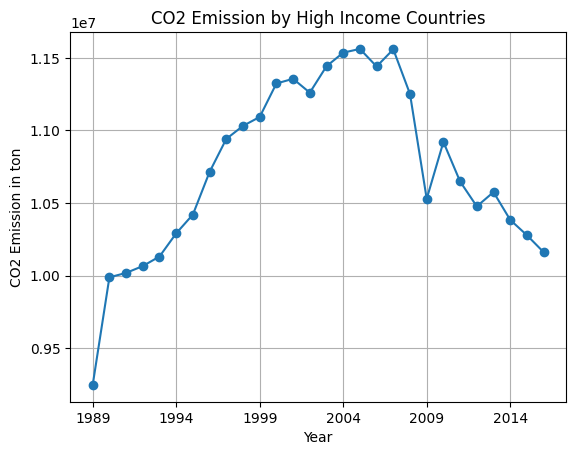

In [30]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('CO2 Emission in ton')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('CO2 Emission by High Income Countries')
plt.grid(True)  # Adding grid lines
plt.show()

In [31]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(highIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data[str(year)] =  pop
    

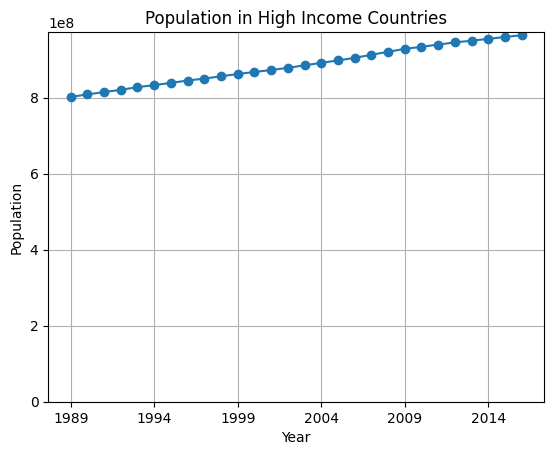

In [32]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Population')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('Population in High Income Countries')
plt.grid(True)  # Adding grid lines
plt.ylim(0)
plt.show()

**Upper middle income**

In [33]:
# Only considered who was 'High income' in every year from 1989 to 2016
upperMiddleIncomeCountries = None

for year in range(2010, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'Upper middle income')]
    if upperMiddleIncomeCountries is None:
        upperMiddleIncomeCountries = set(year_df['country_code'].unique())
    else:
        upperMiddleIncomeCountries &= set(year_df['country_code'].unique())
        
print(upperMiddleIncomeCountries)

{'NRU', 'MDV', 'VCT', 'COL', 'BLZ', 'LBN', 'ROU', 'IRN', 'MNE', 'BIH', 'DMA', 'PRY', 'THA', 'SRB', 'IRQ', 'TKM', 'NAM', 'CRI', 'GAB', 'BGR', 'GUY', 'MYS', 'TUR', 'BWA', 'LCA', 'MEX', 'CHN', 'DOM', 'ZAF', 'JAM', 'MKD', 'MUS', 'GRD', 'ECU', 'CUB', 'SUR', 'PER', 'BLR'}


In [34]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(upperMiddleIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data[str(year)] =  co2_emission_sum
    

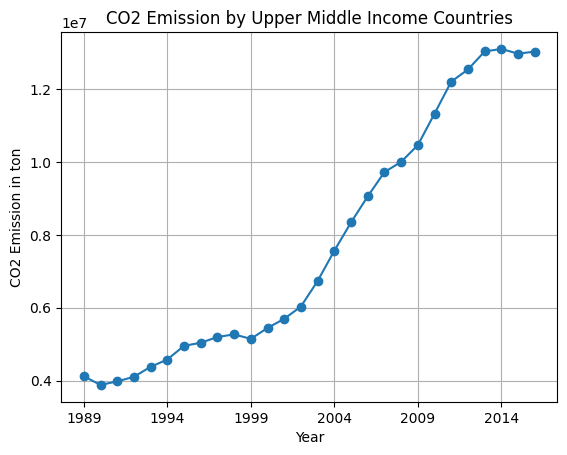

In [35]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('CO2 Emission in ton')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('CO2 Emission by Upper Middle Income Countries')
plt.grid(True)  # Adding grid lines
plt.show()

In [36]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(upperMiddleIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data[str(year)] =  pop
    

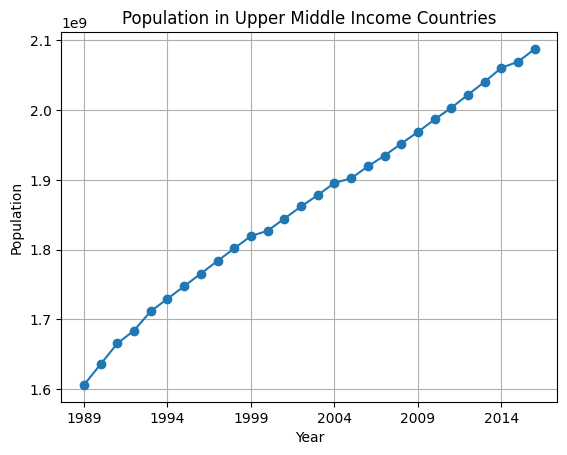

In [37]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Population')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('Population in Upper Middle Income Countries')
plt.grid(True)  # Adding grid lines
plt.show()

In [38]:
# Only considered who was 'Lower Middle income' in every year from 1989 to 2016
lowerMiddleIncomeCountries = None

for year in range(2010, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'Lower middle income')]
    if lowerMiddleIncomeCountries is None:
        lowerMiddleIncomeCountries = set(year_df['country_code'].unique())
    else:
        lowerMiddleIncomeCountries &= set(year_df['country_code'].unique())
        
print(lowerMiddleIncomeCountries)

{'TUV', 'SDN', 'LSO', 'KEN', 'PNG', 'ARM', 'LKA', 'PSE', 'COG', 'KIR', 'UZB', 'CIV', 'PHL', 'SLB', 'VUT', 'YEM', 'IDN', 'BEN', 'BOL', 'HND', 'EGY', 'ZMB', 'MAR', 'SEN', 'CPV', 'VNM', 'NIC', 'MHL', 'FSM', 'CMR', 'COM', 'BTN', 'NGA', 'SLV', 'HTI', 'LAO', 'MRT', 'GHA', 'MDA', 'DJI', 'IND', 'STP'}


In [39]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowerMiddleIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data[str(year)] =  co2_emission_sum

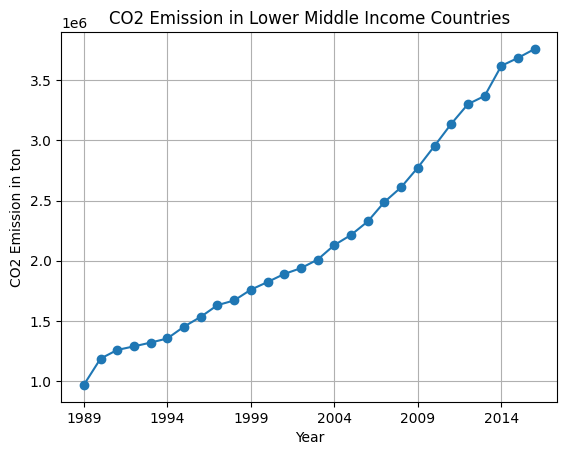

In [40]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('CO2 Emission in ton')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('CO2 Emission in Lower Middle Income Countries')
plt.grid(True)  # Adding grid lines
plt.show()

In [41]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowerMiddleIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data[str(year)] =  pop

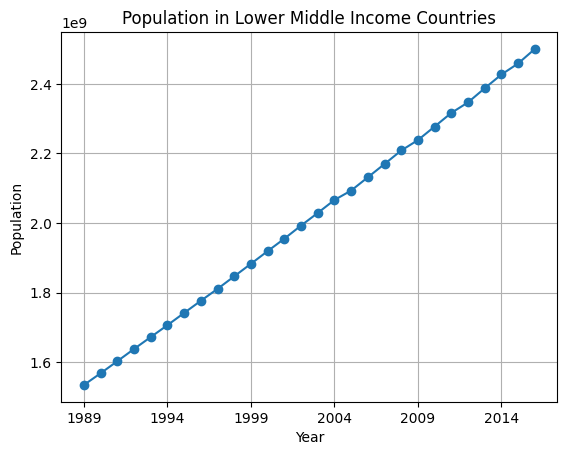

In [42]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Population')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('Population in Lower Middle Income Countries')
plt.grid(True)  # Adding grid lines
plt.show()

In [43]:
# Only considered who was 'Low income' in every year from 1989 to 2016
lowIncomeCountries = None

for year in range(1989, 2017):
    year_df = generalDF[(generalDF['year'] == year) & (generalDF['country_type'] == 'Low income')]
    if lowIncomeCountries is None:
        lowIncomeCountries = set(year_df['country_code'].unique())
    else:
        lowIncomeCountries &= set(year_df['country_code'].unique())
        
print(lowIncomeCountries)

{'BFA', 'RWA', 'UGA', 'COD', 'MLI', 'GIN', 'MWI', 'CAF', 'SLE', 'TCD', 'NER', 'TGO', 'BDI', 'NPL', 'TZA', 'MDG', 'GNB', 'ETH'}


In [44]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data[str(year)] =  co2_emission_sum

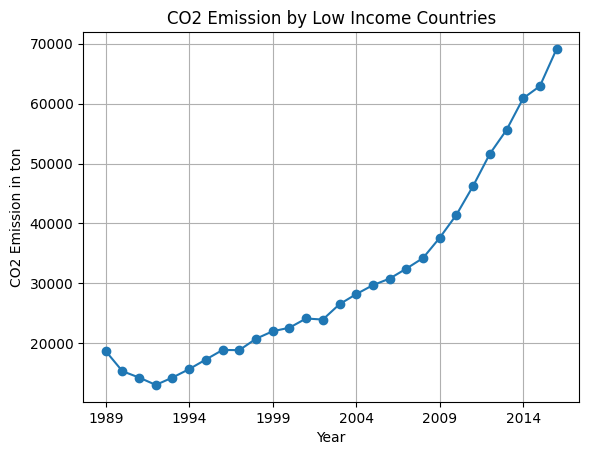

In [45]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('CO2 Emission in ton')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('CO2 Emission by Low Income Countries')
plt.grid(True)  # Adding grid lines
plt.show()

In [46]:
data = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data[str(year)] =  pop

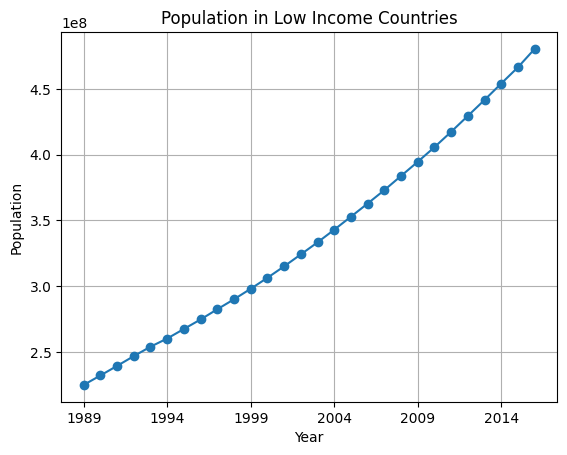

In [47]:
keys = list(data.keys())
values = list(data.values())

# Plotting the data as a line graph
plt.plot(keys, values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Population')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.title('Population in Low Income Countries')
plt.grid(True)  # Adding grid lines
plt.show()

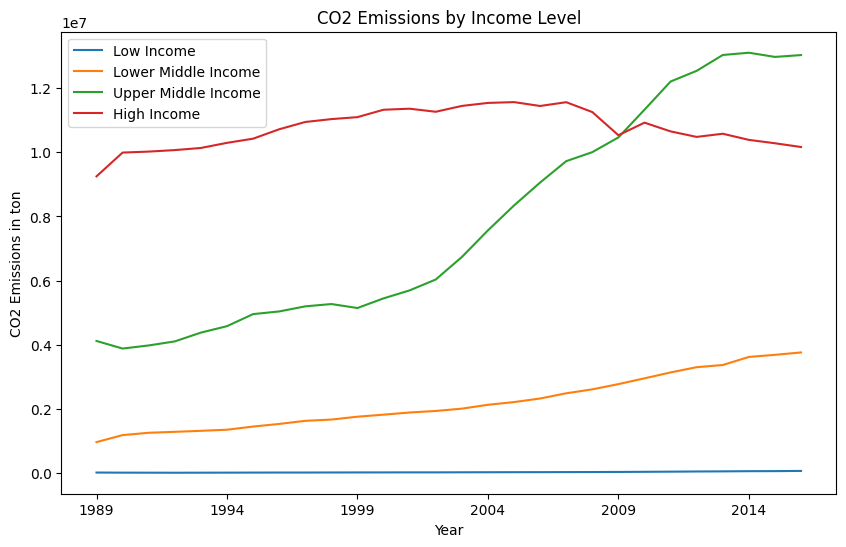

In [48]:
# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

data_low_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_low_income[str(year)] =  co2_emission_sum

data_lower_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowerMiddleIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_lower_middle_income[str(year)] =  co2_emission_sum

data_upper_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(upperMiddleIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_upper_middle_income[str(year)] =  co2_emission_sum

data_high_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(highIncomeCountries))]
    co2_emission_sum = filtered_df['co2_emission'].sum()
    data_high_income[str(year)] =  co2_emission_sum
    
# Plot low income countries
keys = list(data_low_income.keys())
values = list(data_low_income.values())
ax.plot(keys, values, label='Low Income')

# Plot lower middle income countries
keys = list(data_lower_middle_income.keys())
values = list(data_lower_middle_income.values())
ax.plot(keys, values, label='Lower Middle Income')

# Plot upper middle income countries
keys = list(data_upper_middle_income.keys())
values = list(data_upper_middle_income.values())
ax.plot(keys, values, label='Upper Middle Income')

# Plot high income countries
keys = list(data_high_income.keys())
values = list(data_high_income.values())
ax.plot(keys, values, label='High Income')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Emissions in ton')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
ax.set_xticks(tick_positions, tick_labels)
ax.set_title('CO2 Emissions by Income Level')
ax.legend()
ax.grid(False)

# Show the plot
plt.show()

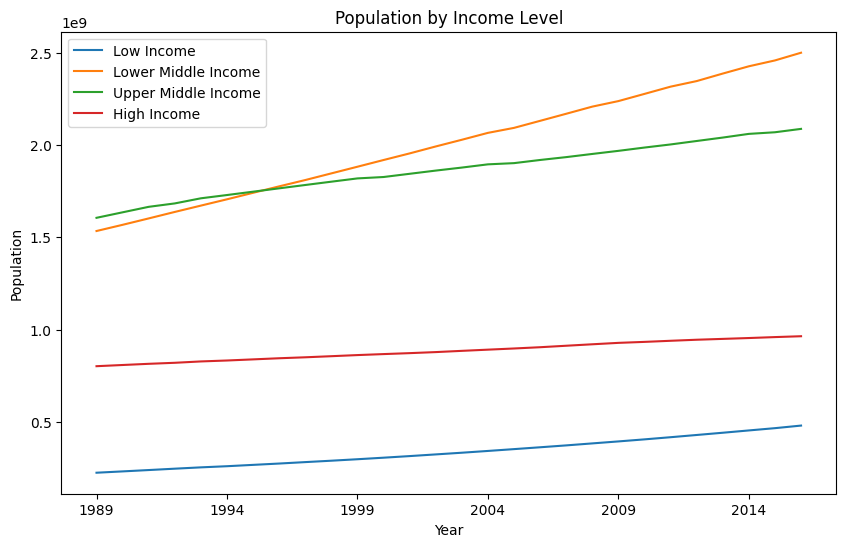

In [49]:
# Create subplots with 1 row and 1 column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

data_low_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data_low_income[str(year)] =  pop

data_lower_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(lowerMiddleIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data_lower_middle_income[str(year)] =  pop

data_upper_middle_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(upperMiddleIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data_upper_middle_income[str(year)] =  pop

data_high_income = {}
for year in range(1989, 2017):
    filtered_df = generalDF[(generalDF['year'] == year) & (generalDF['country_code'].isin(highIncomeCountries))]
    pop = filtered_df['pop'].sum()
    data_high_income[str(year)] =  pop

# Plot low income countries
keys = list(data_low_income.keys())
values = list(data_low_income.values())
ax.plot(keys, values, label='Low Income')

# Plot lower middle income countries
keys = list(data_lower_middle_income.keys())
values = list(data_lower_middle_income.values())
ax.plot(keys, values, label='Lower Middle Income')

# Plot upper middle income countries
keys = list(data_upper_middle_income.keys())
values = list(data_upper_middle_income.values())
ax.plot(keys, values, label='Upper Middle Income')

# Plot high income countries
keys = list(data_high_income.keys())
values = list(data_high_income.values())
ax.plot(keys, values, label='High Income')

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Population')
tick_positions = range(0, len(keys), 5)
tick_labels = [keys[i] if i % 5 == 0 else '' for i in tick_positions]
ax.set_xticks(tick_positions, tick_labels)
ax.set_title('Population by Income Level')
ax.legend()
ax.grid(False)

# Show the plot
plt.show()